# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [4]:
pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.8 MB 1.2 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.8 MB 1.2 MB/s eta 0:00:10
   ----- ---------------------------------- 1.8/12.8 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.8 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.8 MB 1.3 MB/s eta 0:00:09
   -------- ------------------------------- 2.6/12.8 MB 1.2 MB/s eta 0:00:09
   -------- -----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\azams\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, color, exposure, filters, io, morphology
from skimage.exposure import histogram
import cv2

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

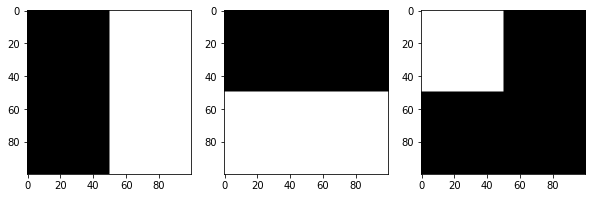

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


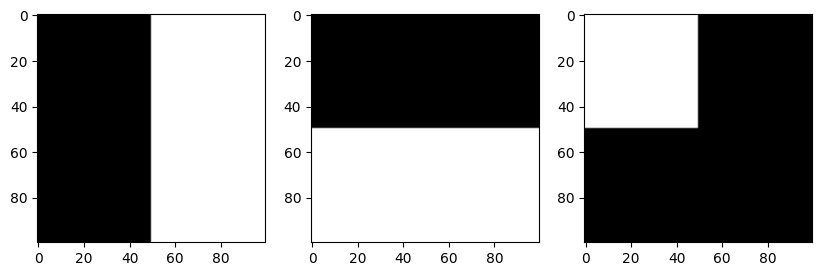

In [12]:
# solution

# Left image
image1 = np.zeros((100, 100))
image1[:, 50:] = 1  # 1 represents white pixels (the right half will be white)

image2 = np.zeros((100, 100))
image2[50:, :] = 1  # Bottom half will be white

image3 = np.zeros((100, 100))
image3[:50, :50] = 1  # Top-left quarter will be white


fig, axes = plt.subplots(1, 3, figsize=(10, 8))
axes[0].imshow(image1, cmap='gray')
axes[1].imshow(image2, cmap='gray')
axes[2].imshow(image3, cmap='gray')

plt.show()

*   Use the above three images to create the following image

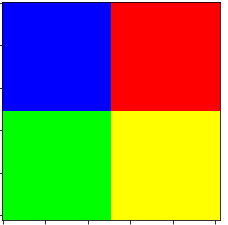
*Hint: Remember channels and color spaces*

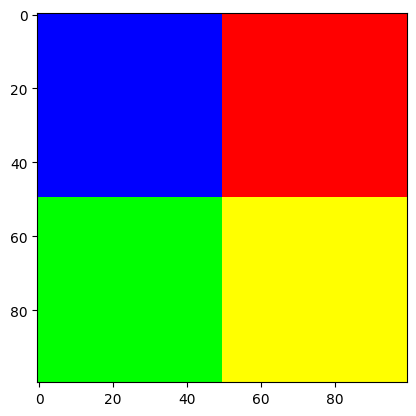

In [20]:
# solution
image = np.zeros((100, 100, 3))  # RGB image initialized as black

image[:50, :50] = [0, 0, 1]   # Top-left: Blue
image[:50, 50:] = [1, 0, 0]   # Top-right: Red
image[50:, :50] = [0, 1, 0]   # Bottom-left: Green
image[50:, 50:] = [1, 1, 0]   # Bottom-right: Yellow

plt.imshow(image)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

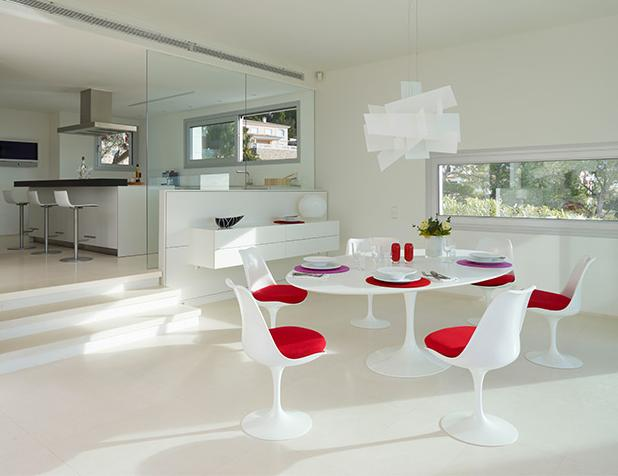

*   Extract individual channels and plot them using matplotlib subplot.



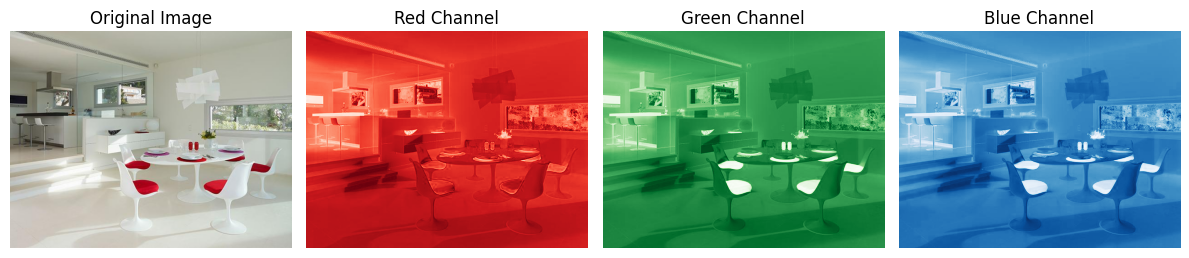

In [22]:
# solution
img = cv2.imread('D:\\Azzam\\Personal_Projects\\SDA\\Computer_Vision\\lab-computer-vision\\images\\sillas.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 loads a BGR format so we convert it to RGB

# Extracting Channels :

red_channel = img_rgb[:, :, 0]
green_channel = img_rgb[:, :, 1]
blue_channel = img_rgb[:, :, 2]

fig, ax = plt.subplots(1, 4, figsize=(12, 8))
ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")

ax[1].imshow(red_channel, cmap='Reds')
ax[1].set_title("Red Channel")

ax[2].imshow(green_channel, cmap='Greens')
ax[2].set_title("Green Channel")

ax[3].imshow(blue_channel, cmap='Blues')
ax[3].set_title("Blue Channel")

for i in ax: # To hide the axes
    i.axis("off")

plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

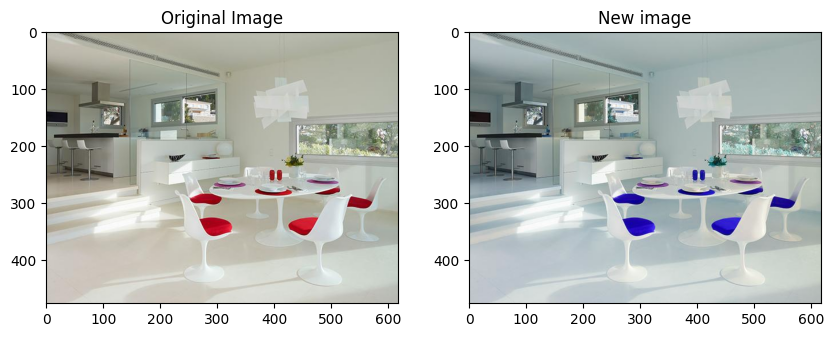

In [25]:
# solution 
new_img = img_rgb.copy()
new_img[:, :, 0] = blue_channel
new_img[:, :, 2] = red_channel

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].imshow(img_rgb)
ax[0].set_title("Original Image")

ax[1].imshow(new_img)
ax[1].set_title("New image")

plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

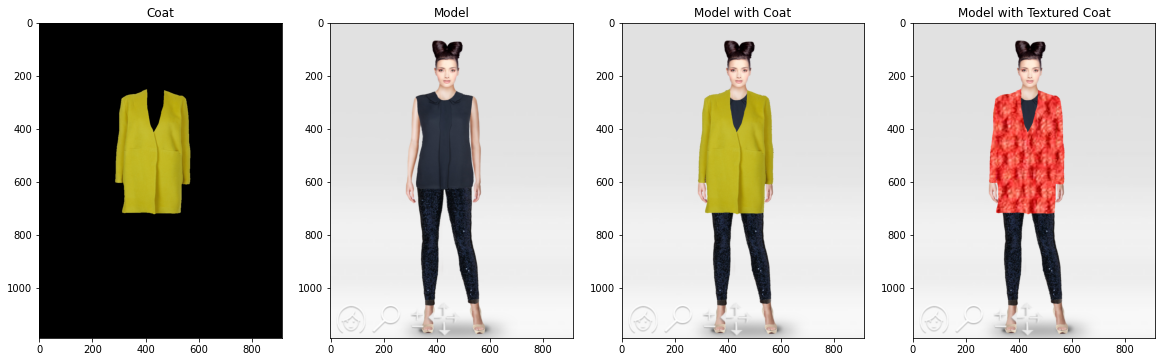

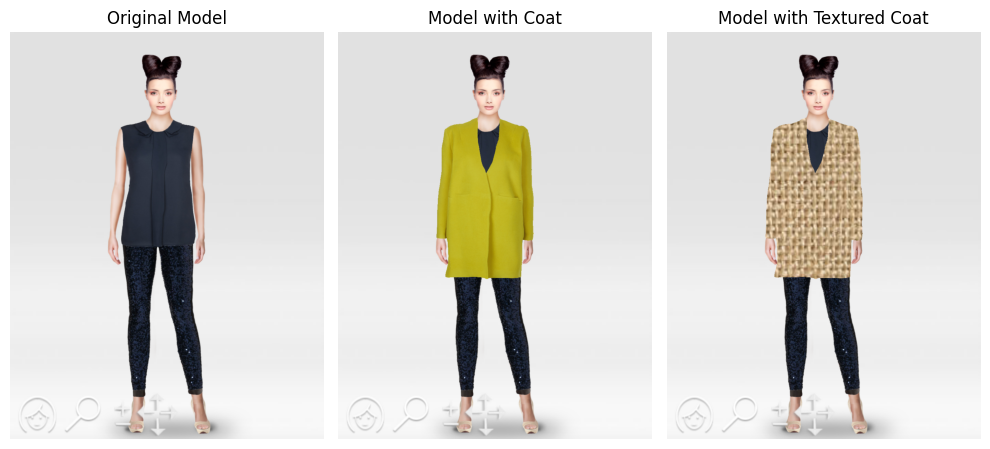

In [38]:
model = cv2.imread('D:\\Azzam\\Personal_Projects\\SDA\\Computer_Vision\\lab-computer-vision\\images\\model.png')
coat = cv2.imread('D:\\Azzam\\Personal_Projects\\SDA\\Computer_Vision\\lab-computer-vision\\images\\coat.png')

# Ensureing the coat is the same size as the model
if coat.shape != model.shape:
    coat = cv2.resize(coat, (model.shape[1], model.shape[0]))

# Create a mask from the coat image
coat_gray = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(coat_gray, 10, 255, cv2.THRESH_BINARY)

# Normalize the mask to range [0, 1]
mask = mask / 255.0

# Use the mask to blend the images
model = model.astype(float)
coat = coat.astype(float)
result = model * (1 - mask[..., np.newaxis]) + coat * mask[..., np.newaxis]
result = result.astype(np.uint8)

# Load a texture for the coat
texture = cv2.imread('D:\\Azzam\\Personal_Projects\\SDA\\Computer_Vision\\lab-computer-vision\\images\\texture3.jpg')
texture = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

# Apply the texture to the coat
texture = texture.astype(float)
textured_coat = model * (1 - mask[..., np.newaxis]) + texture * mask[..., np.newaxis]
textured_coat = textured_coat.astype(np.uint8)

# Convert BGR images to RGB
model_rgb = cv2.cvtColor(model.astype(np.uint8), cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
textured_coat_rgb = cv2.cvtColor(textured_coat, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(model_rgb)
plt.title('Original Model')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_rgb)
plt.title('Model with Coat')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(textured_coat_rgb)
plt.title('Model with Textured Coat')
plt.axis('off')

plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




C:\Users\azams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


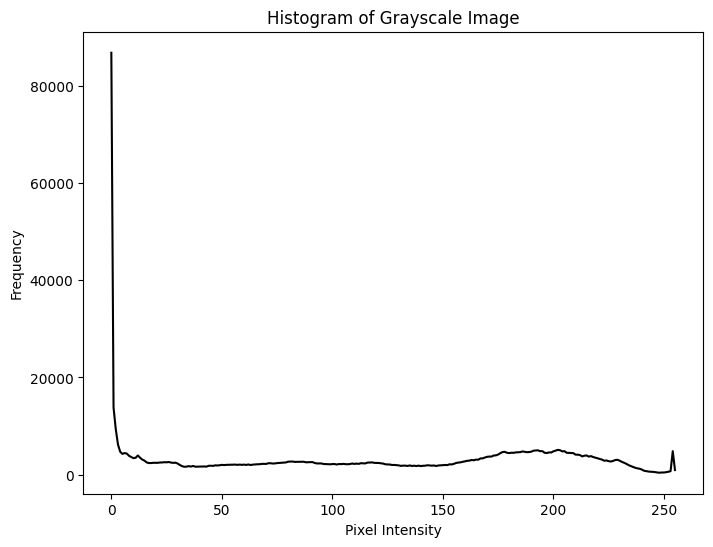

In [44]:
# solution
astro = data.astronaut()
astro_gray = color.rgb2gray(astro) # convert to gray

hist, bin_centers = histogram(astro) # computing the histogram

plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist, color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

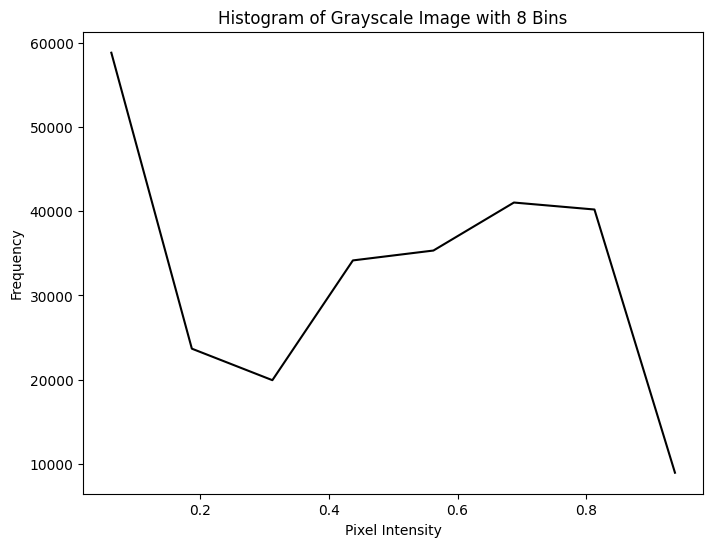

In [45]:
# solution

hist, bin_centers = histogram(astro_gray, nbins=8) # changing the number of bins

plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist, color='black')
plt.title("Histogram of Grayscale Image with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

1- 

Changing the bin count affects the level of detail in the histogram. Fewer bins smooth the data, potentially hiding details, while more bins capture finer details but may introduce noise. 
Our interpretation of the data distribution can change based on the bin count.
We can define correct bin count by using rules like : Sturges, Square Root, or visually by inspecting the histogram.

2- 

When the bin count is low, the histogram becomes overly simplified, losing important details and making it hard to interpret the data distribution accurately.

When the bin count is high, The histogram becomes noisy, with too many small peaks and valleys, making it difficult to see the overall pattern.



*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


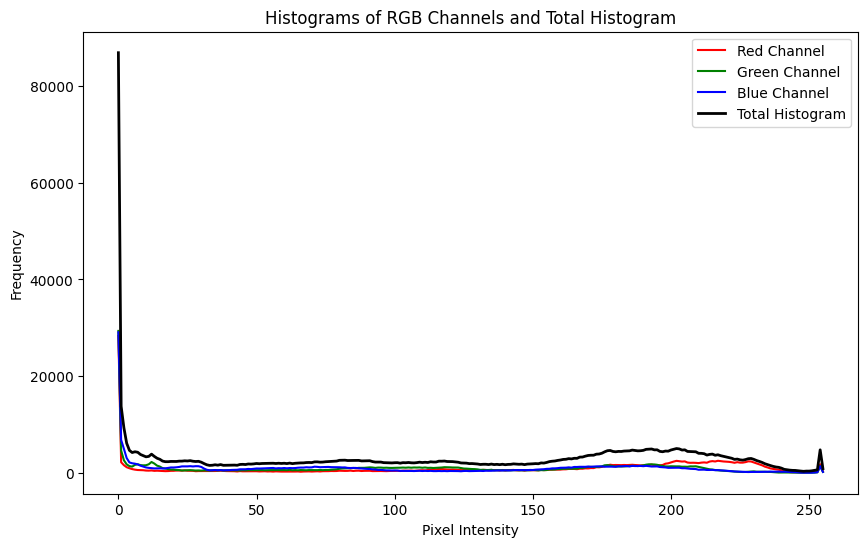

In [ ]:
#solution

# Extract channels :
red_channel = astro[:, :, 0]
green_channel = astro[:, :, 1]
blue_channel = astro[:, :, 2]

# Compute histograms for each channel
hist_red, bins_red = histogram(red_channel, nbins=256)
hist_green, bins_green = histogram(green_channel, nbins=256)
hist_blue, bins_blue = histogram(blue_channel, nbins=256)

# Compute the total histogram 
hist_total = hist_red + hist_green + hist_blue

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.plot(bins_red, hist_red, color='red', label='Red Channel')
plt.plot(bins_green, hist_green, color='green', label='Green Channel')
plt.plot(bins_blue, hist_blue, color='blue', label='Blue Channel')
plt.plot(bins_red, hist_total, color='black', label='Total Histogram', lw=2)

# Set plot labels and title
plt.title("Histograms of RGB Channels and Total Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



C:\Users\azams\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


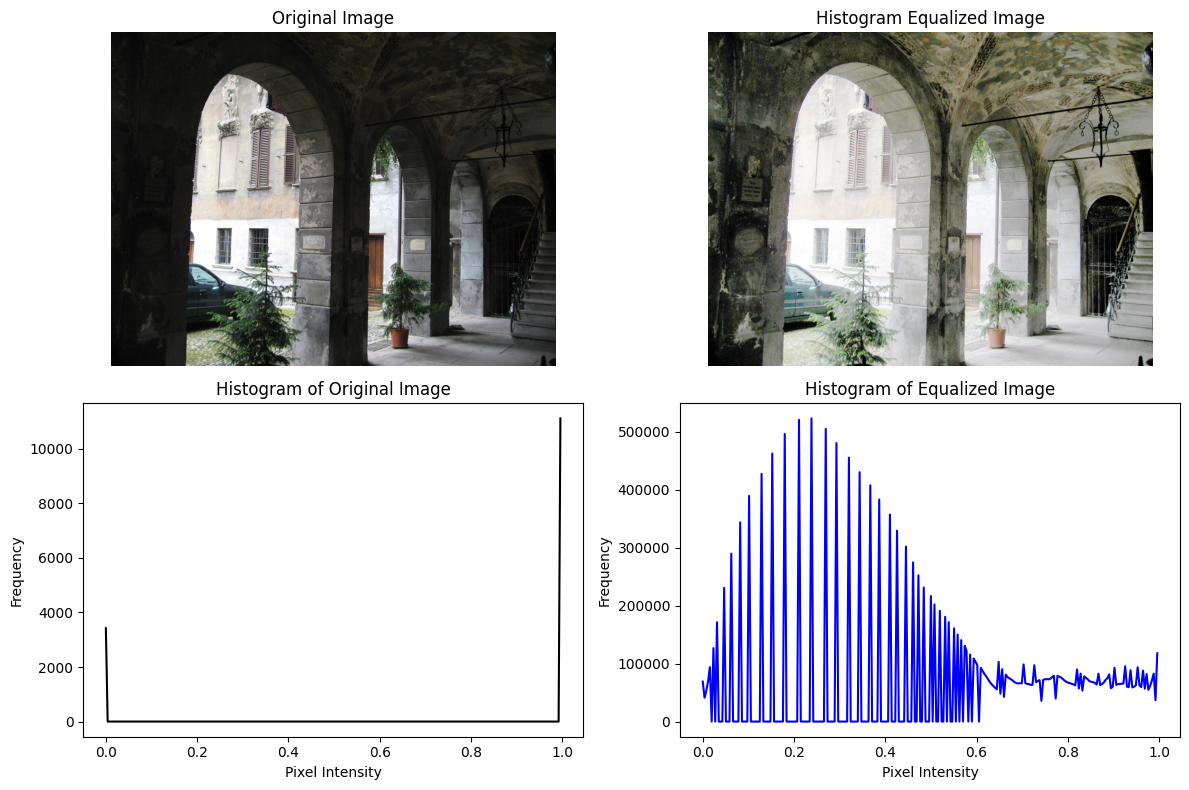

In [60]:
# solution

image = io.imread('images/aquatermi_lowcontrast.jpg')

# histogram of original image
hist_orig, bins_orig = np.histogram(image, bins=256, range=(0, 1))

# histogram equalization
equalized_image = exposure.equalize_hist(image)

# histogram of equalized image
hist_eq, bins_eq = np.histogram(equalized_image, bins=256, range=(0, 1))

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis("off")
ax[0, 1].imshow(equalized_image, cmap='gray')
ax[0, 1].set_title("Histogram Equalized Image")
ax[0, 1].axis("off")

ax[1, 0].plot(bins_orig[:-1], hist_orig, color='black')
ax[1, 0].set_title("Histogram of Original Image")
ax[1, 0].set_xlabel("Pixel Intensity")
ax[1, 0].set_ylabel("Frequency")

ax[1, 1].plot(bins_eq[:-1], hist_eq, color='blue')
ax[1, 1].set_title("Histogram of Equalized Image")
ax[1, 1].set_xlabel("Pixel Intensity")
ax[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

The histogram equalization used, adapts to image intensity distribution.
Linear contrast stretch, applies fixed transformation, scales pixel values linearly between a minimum and maximum range.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



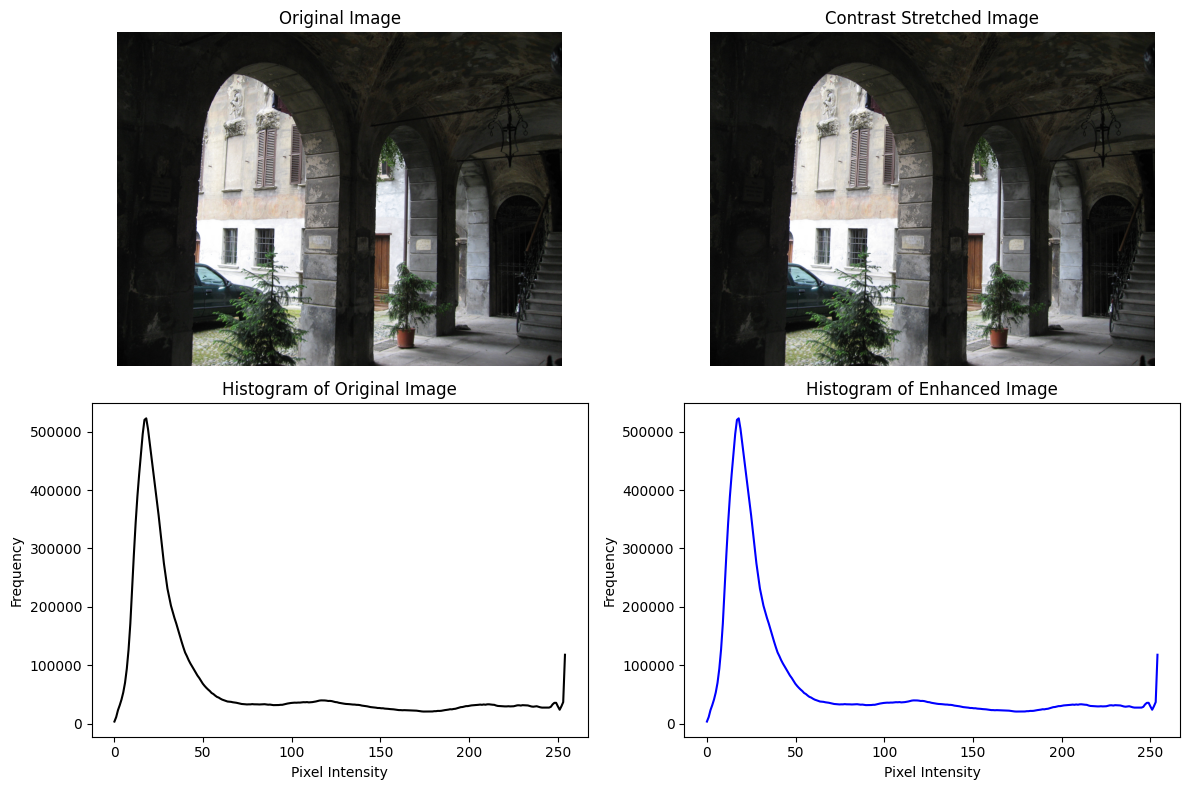

In [ ]:
# solution

def linear_contrast_stretch(image, bins=256):

    # Compute min and max pixel values
    min_val = np.min(image)
    max_val = np.max(image)

    # Apply linear contrast stretching
    stretched_img = (image - min_val) / (max_val - min_val) * 255
    stretched_img = stretched_img.astype(np.uint8)  # Convert back to uint8

    return stretched_img

image = io.imread('images/aquatermi_lowcontrast.jpg')
# Apply the function
enhanced_image = linear_contrast_stretch(image)

# Compute histograms
hist_orig, bins_orig = np.histogram(image, bins=256, range=(0, 255))
hist_enhanced, bins_enhanced = np.histogram(enhanced_image, bins=256, range=(0, 255))

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis("off")

ax[0, 1].imshow(enhanced_image, cmap='gray')
ax[0, 1].set_title("Contrast Stretched Image")
ax[0, 1].axis("off")

ax[1, 0].plot(bins_orig[:-1], hist_orig, color='black')
ax[1, 0].set_title("Histogram of Original Image")
ax[1, 0].set_xlabel("Pixel Intensity")
ax[1, 0].set_ylabel("Frequency")

ax[1, 1].plot(bins_enhanced[:-1], hist_enhanced, color='blue')
ax[1, 1].set_title("Histogram of Enhanced Image")
ax[1, 1].set_xlabel("Pixel Intensity")
ax[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




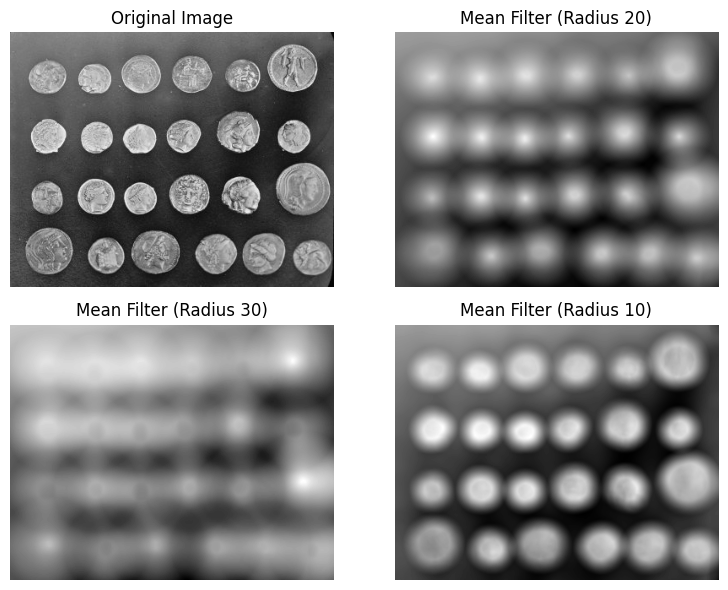

In [75]:
# solution

from skimage import img_as_ubyte
from skimage.filters.rank import mean
from skimage.morphology import disk
from skimage.color import rgb2gray

coins = data.coins()

# Convert to 8-bit grayscale if needed
coins = img_as_ubyte(coins)

# Define structuring elements with different radii
selem_20 = disk(20)
selem_30 = disk(30)  
selem_10 = disk(10)

# Apply mean filtering
mean_20 = mean(coins, selem_20)
mean_30 = mean(coins, selem_30)
mean_10 = mean(coins, selem_10)

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(mean_20, cmap='gray')
axes[0, 1].set_title("Mean Filter (Radius 20)")
axes[0, 1].axis("off")

axes[1, 0].imshow(mean_30, cmap='gray')
axes[1, 0].set_title("Mean Filter (Radius 30)")
axes[1, 0].axis("off")

axes[1, 1].imshow(mean_10, cmap='gray')
axes[1, 1].set_title("Mean Filter (Radius 10)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\azams\AppData\Local\Temp\ipykernel_13692\2903743989.py:5: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square": square(15),
C:\Users\azams\AppData\Local\Temp\ipykernel_13692\2903743989.py:6: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle": rectangle(10, 20),


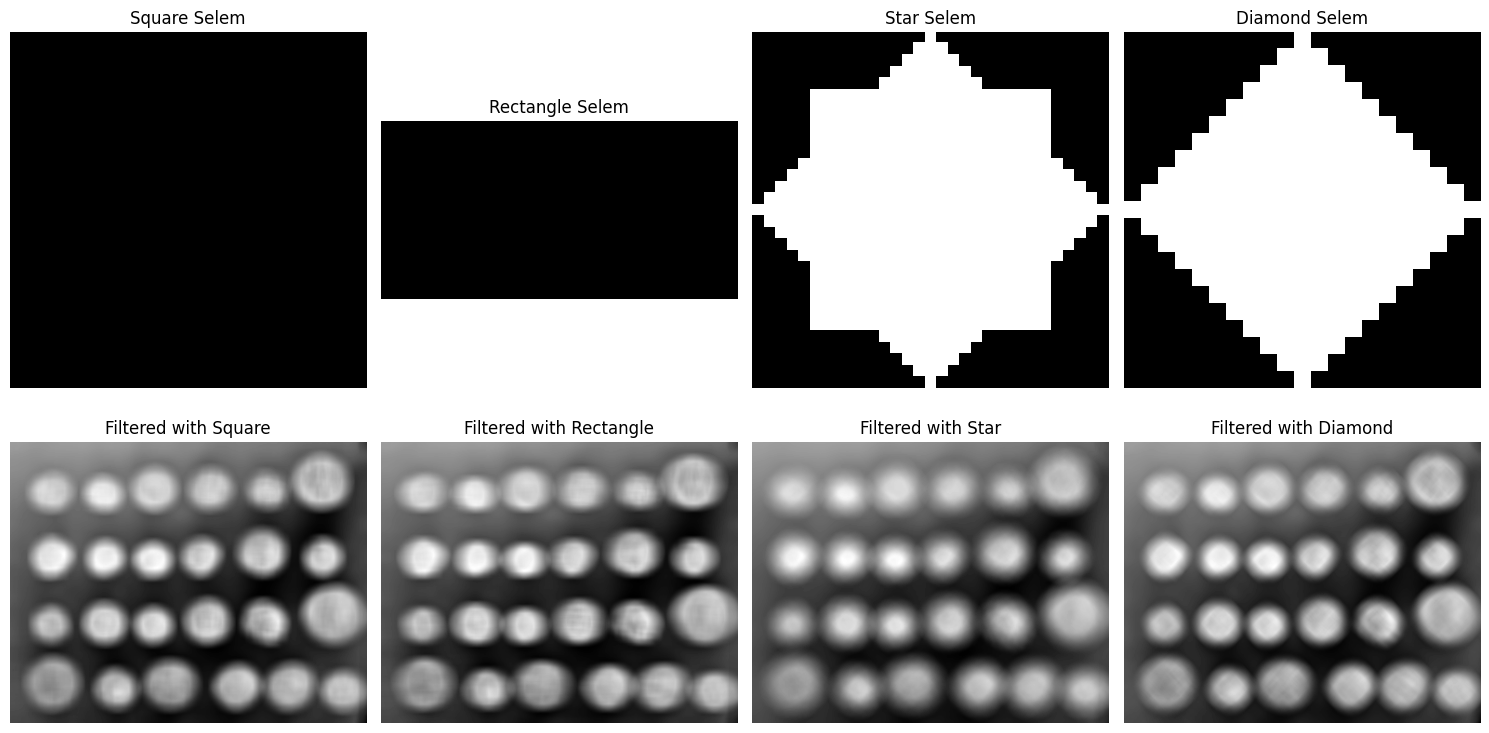

In [ ]:
# solution
from skimage.morphology import square, rectangle, star, diamond

selems = {
    "Square": square(15),
    "Rectangle": rectangle(10, 20),
    "Star": star(10),
    "Diamond": diamond(10)
}

# Apply mean filtering
filtered_images = {name: mean(coins, selem) for name, selem in selems.items()}

fig, axes = plt.subplots(2, len(selems), figsize=(15, 8))

for i, (name, selem) in enumerate(selems.items()):
    # Show the structuring element
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f"{name} Selem")
    axes[0, i].axis("off")

    # Show the filtered image
    axes[1, i].imshow(filtered_images[name], cmap='gray')
    axes[1, i].set_title(f"Filtered with {name}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Increasing the disk radius increases the smoothing effect. Conversely, a smaller radius preserves more details while providing minimal smoothing.




*   What is the observed behaviour with difference in the structuring element?



**Solution**

Square & Rectangle: These produce stronger blurring, as they cover a larger uniform region.

Star: This provides a balanced smoothing.

Diamond: This results in a more localized smoothing effect.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The Mean Filter averages the pixel values in a neighborhood to smooth an image.
Used for general noise reduction, especially salt-and-pepper noise.

The Gaussian Filter applies a weighted average, where nearby pixels have more influence than those farther away. It’s smoother and better at preserving edges compared to the mean filter.
Preferred when we want to reduce Gaussian noise and preserve edges while smoothing the image.